In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("C:/Users/samir/Desktop/ASSIGNMENTS/EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,A,B,C,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,D
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data1 = data.iloc[:,1:]

In [4]:
data1

,Balance,Qual_miles,A,B,C,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,D
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
data1.shape

(3999, 11)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   A                  3999 non-null   int64
 3   B                  3999 non-null   int64
 4   C                  3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  D                  3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
data1.describe()

,Balance,Qual_miles,A,B,C,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,D
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
A = data1.iloc[:,0:2]

In [9]:
A.head()

,Balance,Qual_miles
0,28143,0
1,19244,0
2,41354,0
3,14776,0
4,97752,0


In [10]:
B = data1.iloc[:,5:10]

In [11]:
B

,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,174,1,0,0,7000
1,215,2,0,0,6968
2,4123,4,0,0,7034
3,500,1,0,0,6952
4,43300,26,2077,4,6935
...,...,...,...,...,...
3994,8525,4,200,1,1403
3995,981,5,0,0,1395
3996,25447,8,0,0,1402
3997,500,1,500,1,1401


In [12]:
df1 = pd.concat([A,B],axis=1)
df1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [13]:
df1.shape

(3999, 7)

In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [15]:
df_norm = norm_func(df1)

In [16]:
df_norm.describe()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.065020,0.134906,0.014929,0.025917,0.496330
std,0.059112,0.069399,0.091590,0.111672,0.045436,0.071569,0.248991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685
50%,0.025279,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610
75%,0.054201,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


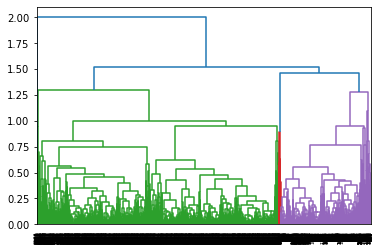

In [17]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [113]:
hc = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage = 'ward')

In [114]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc,columns=["Clusters"])

In [115]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
3994,7
3995,7
3996,3
3997,7


In [116]:
df2 = pd.concat([df1,Clusters],axis=1)

In [117]:
df2.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,174,1,0,0,7000,1
1,19244,0,215,2,0,0,6968,1
2,41354,0,4123,4,0,0,7034,1
3,14776,0,500,1,0,0,6952,1
4,97752,0,43300,26,2077,4,6935,1


In [118]:
df2.groupby(df2.Clusters).mean()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
Clusters,,,,,,,,
0,62478.344916,25.804376,15020.009009,9.612613,142.441441,0.445302,3273.481338,0.0
1,79908.798780,48.859756,15531.021951,11.069512,261.032927,0.804878,6854.695122,1.0
2,57910.688470,71.870288,9983.235033,10.067627,361.008869,1.060976,4805.987805,2.0
3,52732.953453,153.732733,15892.513514,15.106607,477.797297,1.333333,1845.780781,3.0
4,224204.955882,152.705882,72173.389706,23.205882,685.558824,2.025735,5547.852941,4.0
5,151045.282353,377.917647,39401.776471,34.635294,6768.470588,20.235294,5212.776471,5.0
6,151783.800000,5874.977778,18019.400000,13.822222,1263.133333,4.355556,4823.155556,6.0
7,28361.953704,25.354167,1795.780093,1.921296,121.673611,0.405093,1324.858796,7.0


In [119]:
df2.Clusters.value_counts()

2    902
1    820
0    777
3    666
7    432
4    272
5     85
6     45
Name: Clusters, dtype: int64

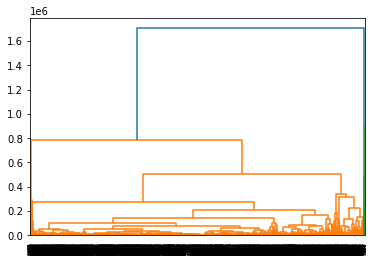

In [25]:
dendrogram = sch.dendrogram(sch.linkage(data1,method="complete"))

In [108]:
hc2 = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage = 'ward')

In [109]:
y_hc2 = hc2.fit_predict(data1)
Clusters2 = pd.DataFrame(y_hc2,columns=["Clusters2"])
Clusters2

,Clusters2
0,2
1,2
2,2
3,2
4,1
...,...
3994,2
3995,1
3996,1
3997,1


In [110]:
df3 = pd.concat([data1,Clusters2],axis=1)
df3

,Balance,Qual_miles,A,B,C,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,D,Clusters2
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [111]:
df3.groupby(df3.Clusters2).mean()

,Balance,Qual_miles,A,B,C,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,D,Clusters2
Clusters2,,,,,,,,,,,,
0,1.346122e+05,245.657143,3.102381,1.011905,1.090476,37605.707143,16.871429,784.195238,2.352381,4891.269048,0.492857,0.0
1,7.533868e+04,120.885437,2.557282,1.009709,1.007767,22349.167961,14.059223,539.990291,1.514563,4338.904854,0.399029,1.0
2,2.212960e+04,95.710755,1.469565,1.018307,1.000000,7136.640732,8.241190,225.946453,0.712128,3656.610984,0.298398,2.0
3,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000,3.0
4,3.226657e+05,400.400000,3.114286,1.019048,1.000000,47908.866667,20.257143,1645.666667,5.019048,5524.590476,0.695238,4.0
5,7.343741e+05,270.952381,3.428571,1.000000,1.142857,56171.666667,21.809524,1570.000000,5.523810,6120.047619,0.857143,5.0
6,2.077138e+05,339.519608,2.897059,1.000000,1.000000,31895.799020,17.735294,988.960784,2.784314,5057.264706,0.465686,6.0
7,4.731940e+05,512.551724,2.862069,1.034483,1.000000,42840.379310,17.103448,1352.827586,4.172414,6125.034483,0.724138,7.0


In [112]:
df3.Clusters2.value_counts()

2    2185
1    1030
0     420
6     204
4     105
7      29
5      21
3       5
Name: Clusters2, dtype: int64

In [80]:
from sklearn.cluster import KMeans

In [98]:
twss2 = []

In [99]:
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    twss2.append(kmeans.inertia_)

In [100]:
twss2

[393.2161936035969,
 211.17579086815127,
 173.01856360232705,
 149.46074222297923,
 135.20834260248895,
 122.9589324177527,
 114.27674238384732,
 103.31609084937213,
 95.67072468793876,
 90.08484876133168,
 85.7884411347709,
 81.3457826559357,
 77.73599357058099,
 74.89440393009343]

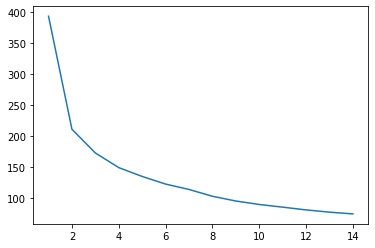

In [102]:
plt.plot(range(1,15),twss2)
plt.show()

In [120]:
kmeans = KMeans( n_clusters = 8,random_state=0)
kmeans.fit(df_norm)
pred = kmeans.fit_predict(df_norm)

In [121]:
kmeans.inertia_

103.31609084937213

In [122]:
pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# BY USING SCREE PLOT I GOT 8 NUMBERS OF CLUSTERS IS SUFFICIENT TO CLASSIFY THE DATA.
# I GOT BETTER CLUSTERING RESULTS IN NORMALISED DATA.
# 